In [122]:
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import parc
import seaborn as sns
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, zoomed_inset_axes
from skimage import measure
from sklearn.preprocessing import MinMaxScaler

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# Import path
module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
from config import *

In [6]:
csv_file = data_meta / "all_info.csv"

# Read dataframe containing images information
df = pd.read_csv(csv_file)

In [7]:
df.Location = df.Location.astype(str)

In [8]:
module_path = str(Path.cwd().parents[0] / "src")

if module_path not in sys.path:
    sys.path.append(module_path)
    
import utils as utils

In [11]:
# Parameters
min_cluster_size = 500
min_intensity = 0.1
random_seed = 1

# Read data

In [15]:
pixel_features = data_meta / 'pixel_intensity.csv'  # location of file
df = pd.read_csv(pixel_features)
pixels = df.iloc[:, 3:-5]
display(pixels.max())

# Scale data
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(pixels)
pixels_scaled = pd.DataFrame(x_scaled, columns=pixels.columns)
display(pixels_scaled.describe())

Cyclin E                 45321
EMMPRIN                  63119
Wnt1                     24998
Non-phospho-B-catenin    15224
APC                      62850
DKK1                      3231
DKK2                     11582
AXIN1                    62436
Cyclin D1                62537
p-AKT                    23576
phospho-B-catenin        25796
RNF 43                    3244
AKT                      28725
p-mTOR                   62603
mTOR                      4310
dtype: int64

,Cyclin E,EMMPRIN,Wnt1,Non-phospho-B-catenin,APC,DKK1,DKK2,AXIN1,Cyclin D1,p-AKT,phospho-B-catenin,RNF 43,AKT,p-mTOR,mTOR
count,3.083855e+06,3.083855e+06,3.083855e+06,3.083855e+06,3.083855e+06,3.083855e+06,3.083855e+06,3.083855e+06,3.083855e+06,3.083855e+06,3.083855e+06,3.083855e+06,3.083855e+06,3.083855e+06,3.083855e+06
mean,1.188216e-02,8.587408e-03,7.113505e-03,4.612496e-02,8.779340e-03,4.092889e-02,4.833518e-02,6.003187e-03,6.453971e-03,2.312448e-02,1.138845e-02,3.348198e-02,1.829127e-02,4.762703e-03,2.728573e-02
std,1.310568e-02,1.047947e-02,7.320708e-03,4.221320e-02,9.971203e-03,1.977307e-02,4.380059e-02,5.903375e-03,5.607216e-03,1.887566e-02,7.726485e-03,1.785251e-02,1.331073e-02,3.544182e-03,1.410309e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.037863e-03,3.231990e-03,3.160253e-03,1.694693e-02,3.866348e-03,2.723615e-02,1.813158e-02,3.363444e-03,3.661832e-03,8.992195e-03,6.396341e-03,2.096178e-02,8.633594e-03,2.779420e-03,1.786543e-02
50%,9.201033e-03,6.559039e-03,5.560445e-03,3.461640e-02,7.000796e-03,3.961622e-02,3.652219e-02,5.349478e-03,5.788573e-03,1.951137e-02,1.085440e-02,3.236745e-02,1.667537e-02,4.472629e-03,2.645012e-02
75%,1.648243e-02,1.097926e-02,8.800704e-03,6.463479e-02,1.116945e-02,5.261529e-02,6.561906e-02,7.671856e-03,8.315077e-03,3.325416e-02,1.558381e-02,4.500617e-02,2.590078e-02,6.309602e-03,3.549884e-02
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [16]:
pixel_dark = pixels_scaled.le(min_intensity).all(axis=1)
display(pixel_dark.value_counts())
pixels_bright = pixels_scaled[~pixel_dark]
display(pixels_bright.head())

True     2569967
False     513888
dtype: int64

,Cyclin E,EMMPRIN,Wnt1,Non-phospho-B-catenin,APC,DKK1,DKK2,AXIN1,Cyclin D1,p-AKT,phospho-B-catenin,RNF 43,AKT,p-mTOR,mTOR
158,0.019594,0.035172,0.013041,0.082173,0.004216,0.048282,0.109394,0.003075,0.003054,0.0,0.002907,0.025894,0.008529,0.000735,0.009745
166,0.030008,0.015574,0.008401,0.119679,0.005585,0.051068,0.089276,0.005670,0.003358,0.0,0.000000,0.007398,0.004874,0.000000,0.000000
169,0.022175,0.015605,0.008761,0.119679,0.005076,0.043330,0.089449,0.007448,0.003742,0.0,0.002559,0.037300,0.011070,0.000000,0.006265
173,0.020564,0.014116,0.012761,0.101550,0.009881,0.042092,0.093507,0.002899,0.003214,0.0,0.000000,0.045314,0.000000,0.000000,0.022738
176,0.023146,0.015495,0.007641,0.124015,0.002784,0.019499,0.105940,0.005750,0.005389,0.0,0.000000,0.042232,0.008599,0.000000,0.018794


# Clustering

In [17]:
def clustering_parc(X, small_pop=200):
    parc1 = parc.PARC(X, jac_weighted_edges = False, small_pop = small_pop)
    parc1.run_PARC() 
    labels = parc1.labels
    
    graph = parc1.knngraph_full()
    embedding= parc1.run_umap_hnsw(X, graph, random_state = 1)
    return labels, embedding

In [18]:
# Clustering
parc_labels, embeddings = clustering_parc(pixels_bright.values)

input data has shape 513888 (samples) x 15 (features)
knn struct was not available, so making one
commencing global pruning
commencing community detection
partition type MVP
list of cluster labels and populations 29 [(0, 46195), (1, 44279), (2, 36659), (3, 35837), (4, 34486), (5, 33068), (6, 31437), (7, 31331), (8, 30673), (9, 30081), (10, 29584), (11, 27535), (12, 20585), (13, 19625), (14, 18778), (15, 11278), (16, 6713), (17, 5422), (18, 3743), (19, 2993), (20, 2632), (21, 2313), (22, 2087), (23, 1557), (24, 1368), (25, 1274), (26, 1095), (27, 875), (28, 385)]
time elapsed 311.4 seconds
a,b, spread, dist 1.5769434603935901 0.8950608781603765 1.0 0.1
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs


(-5.385414552688599,
 19.969577264785766,
 -8.069302868843078,
 18.476548027992248)

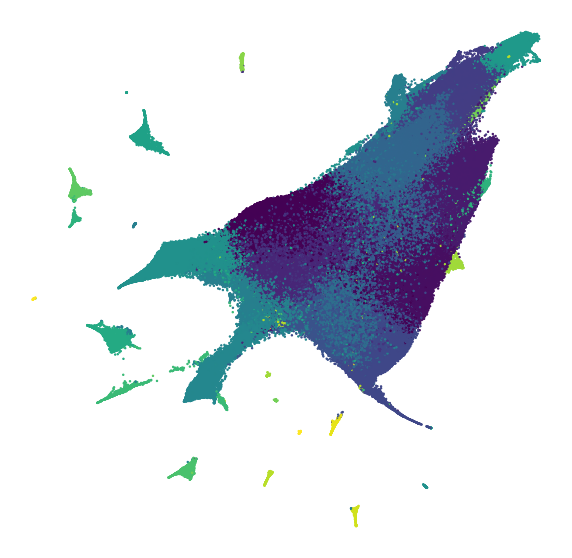

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
X, Y = embeddings[:, 0], embeddings[:, 1]
ax.scatter(X, Y, c=parc_labels, s= 2)
ax.axis('off')

# Viz

## Cluster visualization of markers expression

In [23]:
pixels_bright['label'] = parc_labels

C:\Users\thu71\.conda\envs\work\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
# Get dataframe per cluster
df_per_label = pixels_bright.groupby('label').mean()
df_per_label.head()

,Cyclin E,EMMPRIN,Wnt1,Non-phospho-B-catenin,APC,DKK1,DKK2,AXIN1,Cyclin D1,p-AKT,phospho-B-catenin,RNF 43,AKT,p-mTOR,mTOR
label,,,,,,,,,,,,,,,
0,0.024585,0.011311,0.005807,0.114408,0.009957,0.028203,0.096140,0.008102,0.009235,0.052462,0.017450,0.032535,0.035309,0.006702,0.024734
1,0.019420,0.008634,0.005722,0.098145,0.008935,0.040346,0.135501,0.008560,0.009508,0.055250,0.017956,0.024764,0.038842,0.006833,0.030286
2,0.024180,0.010190,0.006540,0.128655,0.011832,0.055890,0.171749,0.010474,0.011310,0.069930,0.022054,0.035493,0.048433,0.008109,0.031980
3,0.025503,0.013380,0.008316,0.115681,0.011733,0.057521,0.099771,0.008668,0.010321,0.052732,0.018463,0.047385,0.036990,0.007622,0.032314
4,0.023571,0.010047,0.005822,0.115788,0.010978,0.049533,0.107646,0.007477,0.008707,0.037591,0.014227,0.028010,0.025824,0.005663,0.029201


In [70]:
my_cmap = 'viridis'
scale_name = 'Relative Intensity' 

# my_cmap = 'bwr'
# scale_name = 'Z-score'

In [71]:
log_norm = LogNorm(vmin=np.min(df_per_label.values), vmax=np.max(df_per_label.values))

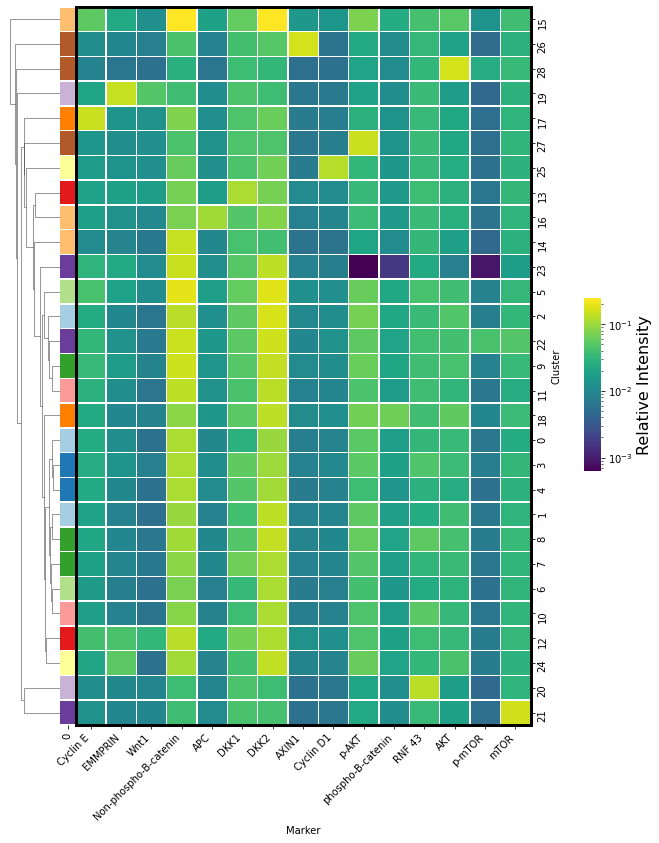

In [85]:
# # Heatmap combined
# fig, ax = plt.subplots(figsize=(8, 12))
# ax = sns.heatmap(df_per_label,
#                  cbar_kws={'fraction': 0.01},
#                  cmap=my_cmap,
#                  norm = log_norm,
#                  linewidth=0.5)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45,
#                    horizontalalignment='right')
# ax.set_xlabel('Marker')
# ax.set_ylabel('Cluster')

# # Change colorbar label position
# cbar = ax.collections[0].colorbar
# cbar.set_label(scale_name, fontsize= 16)

# for _, spine in ax.spines.items():
#     spine.set_visible(True)
#     spine.set_linewidth(3)

# Clustermap 
# Get random colormap
vals = np.linspace(0, 1, len(df_per_label))
my_cmap_row = plt.cm.Paired(vals)
# Change to row colors for clustermap
labels = df_per_label.index.to_list()
my_cmap_dict = dict(zip(labels, my_cmap_row))
row_colors = pd.DataFrame(labels)[0].map(my_cmap_dict)

ax = sns.clustermap(df_per_label,
                    cbar_kws={'fraction': 0.01},
                    cmap=my_cmap,
                    norm = log_norm,
                    linewidth=0.5,
                    col_cluster=False,
                    row_colors=row_colors,
                    dendrogram_ratio=(.1, 0),
                    cbar_pos=(1.02, .45, .03, .2),
                    figsize=(8, 12)
                   )
ax.ax_heatmap.set_xticklabels(
ax.ax_heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.ax_heatmap.set_xlabel('Marker')
ax.ax_heatmap.set_ylabel('Cluster')

# Change colorbar label position
cbar = ax.ax_heatmap.collections[0].colorbar
cbar.set_label(scale_name, fontsize= 16)


for _, spine in ax.ax_heatmap.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(3)

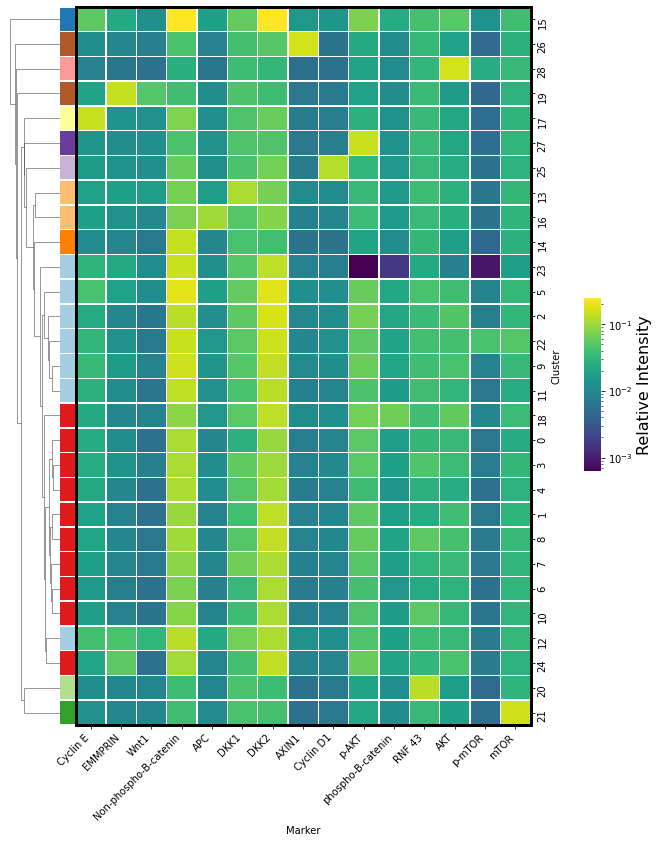

In [102]:
import scipy.cluster.hierarchy as sch

d = sch.distance.pdist(df_per_label)
L = sch.linkage(d, method='complete')
clusters = sch.fcluster(L, 0.3*d.max(), 'distance')
clusters_unique = np.unique(clusters)
n_clusters = len(np.unique(clusters))

# Clustermap 
# Get random colormap
vals = np.linspace(0, 1, n_clusters)
my_cmap_row = plt.cm.Paired(vals)
# Change to row colors for clustermap
labels = df_per_label.index.to_list()
label2cluster = dict(zip(labels, clusters))
my_cmap_dict = dict(zip(clusters_unique, my_cmap_row))
row_colors = pd.DataFrame(labels)[0].map(label2cluster).map(my_cmap_dict)

ax = sns.clustermap(df_per_label,
                    cbar_kws={'fraction': 0.01},
                    cmap=my_cmap,
                    norm = log_norm,
                    linewidth=0.5,
                    col_cluster=False,
                    row_colors=[row_colors],
                    dendrogram_ratio=(.1, 0),
                    cbar_pos=(1.02, .45, .03, .2),
                    figsize=(8, 12)
                   )
ax.ax_heatmap.set_xticklabels(
ax.ax_heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.ax_heatmap.set_xlabel('Marker')
ax.ax_heatmap.set_ylabel('Cluster')

# Change colorbar label position
cbar = ax.ax_heatmap.collections[0].colorbar
cbar.set_label(scale_name, fontsize= 16)


for _, spine in ax.ax_heatmap.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(3)

## Pixel location visualization

First we add back the location and condition information in the pixel_bright dataframe

In [105]:
pixels_bright_position = pixels_bright.join(df.iloc[:, -4:])
pixels_bright_position.head()

,Cyclin E,EMMPRIN,Wnt1,Non-phospho-B-catenin,APC,DKK1,DKK2,AXIN1,Cyclin D1,p-AKT,phospho-B-catenin,RNF 43,AKT,p-mTOR,mTOR,label,Location,X,Y,Id
158,0.019594,0.035172,0.013041,0.082173,0.004216,0.048282,0.109394,0.003075,0.003054,0.0,0.002907,0.025894,0.008529,0.000735,0.009745,23,1,0,1015,3
166,0.030008,0.015574,0.008401,0.119679,0.005585,0.051068,0.089276,0.005670,0.003358,0.0,0.000000,0.007398,0.004874,0.000000,0.000000,23,1,0,1023,3
169,0.022175,0.015605,0.008761,0.119679,0.005076,0.043330,0.089449,0.007448,0.003742,0.0,0.002559,0.037300,0.011070,0.000000,0.006265,23,1,0,1026,3
173,0.020564,0.014116,0.012761,0.101550,0.009881,0.042092,0.093507,0.002899,0.003214,0.0,0.000000,0.045314,0.000000,0.000000,0.022738,23,1,0,1030,3
176,0.023146,0.015495,0.007641,0.124015,0.002784,0.019499,0.105940,0.005750,0.005389,0.0,0.000000,0.042232,0.008599,0.000000,0.018794,23,1,0,1033,3


In [110]:
condition = 1
idx = str(condition)

df_subset = pixels_bright_position[pixels_bright_position.Location == condition]

In [111]:
masks = utils.get_masks(data_mask)
mask, mask_nuclei, _ = utils.qc_nuclei(masks[idx]['cyto'], masks[idx]['nuclei'])
mask_binary = np.where(mask > 0, 1, 0)

In [117]:
# Create image from pixel location
x_max, y_max = mask.shape

x = df_subset.X.tolist()
y = df_subset.Y.tolist()
values = df_subset.label.map(label2cluster).tolist()

img = np.zeros((x_max, y_max))
img[x, y] = values

In [118]:
# Get contour of masks
contours = {}
contours_nuclei = {}
labels = [n for n in np.unique(mask) if n > 0]
for i in labels:
    temp = np.where(mask == i, mask, 0)
    contours[i] = np.concatenate(measure.find_contours(temp, 0.1))
    temp = np.where(mask_nuclei == i, mask, 0)
    contours_nuclei[i] = np.concatenate(measure.find_contours(temp, 0.1))

(-0.5, 1885.5, 1420.5, -0.5)

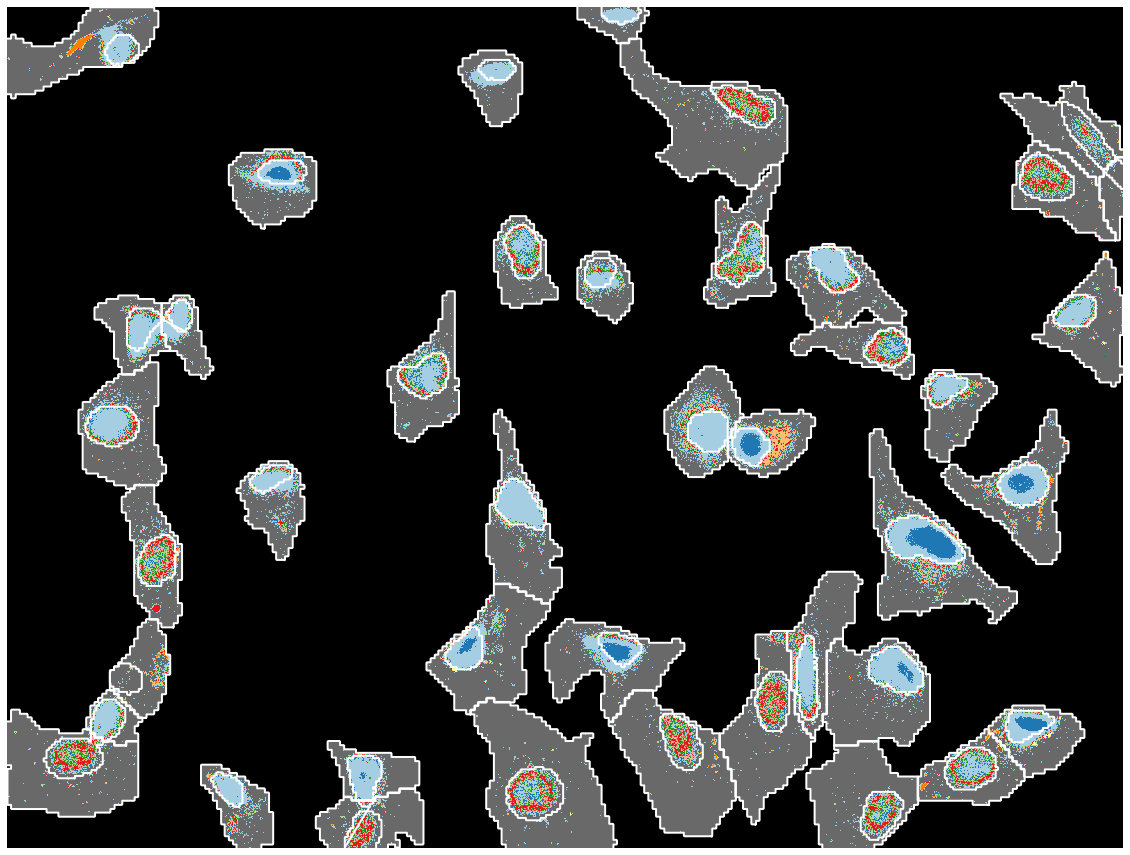

In [119]:
# Get random colormap
bg_color = np.array([[0, 0, 0, 0]])
colors = np.concatenate((bg_color, my_cmap_row))
my_cmap_bg = plt.cm.colors.ListedColormap(colors)
my_cmap_binary = plt.cm.colors.ListedColormap(['k', 'dimgray'])

# Show contour
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(mask_binary, cmap=my_cmap_binary)
ax.imshow(img, cmap=my_cmap_bg)
for label, contour in contours.items():
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2, c='w')
    ax.plot(contours_nuclei[label][:, 1],
            contours_nuclei[label][:, 0], linewidth=2, c='w')
ax.axis('off')

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x1fd07ee1108>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x1fd07ee1e08>)

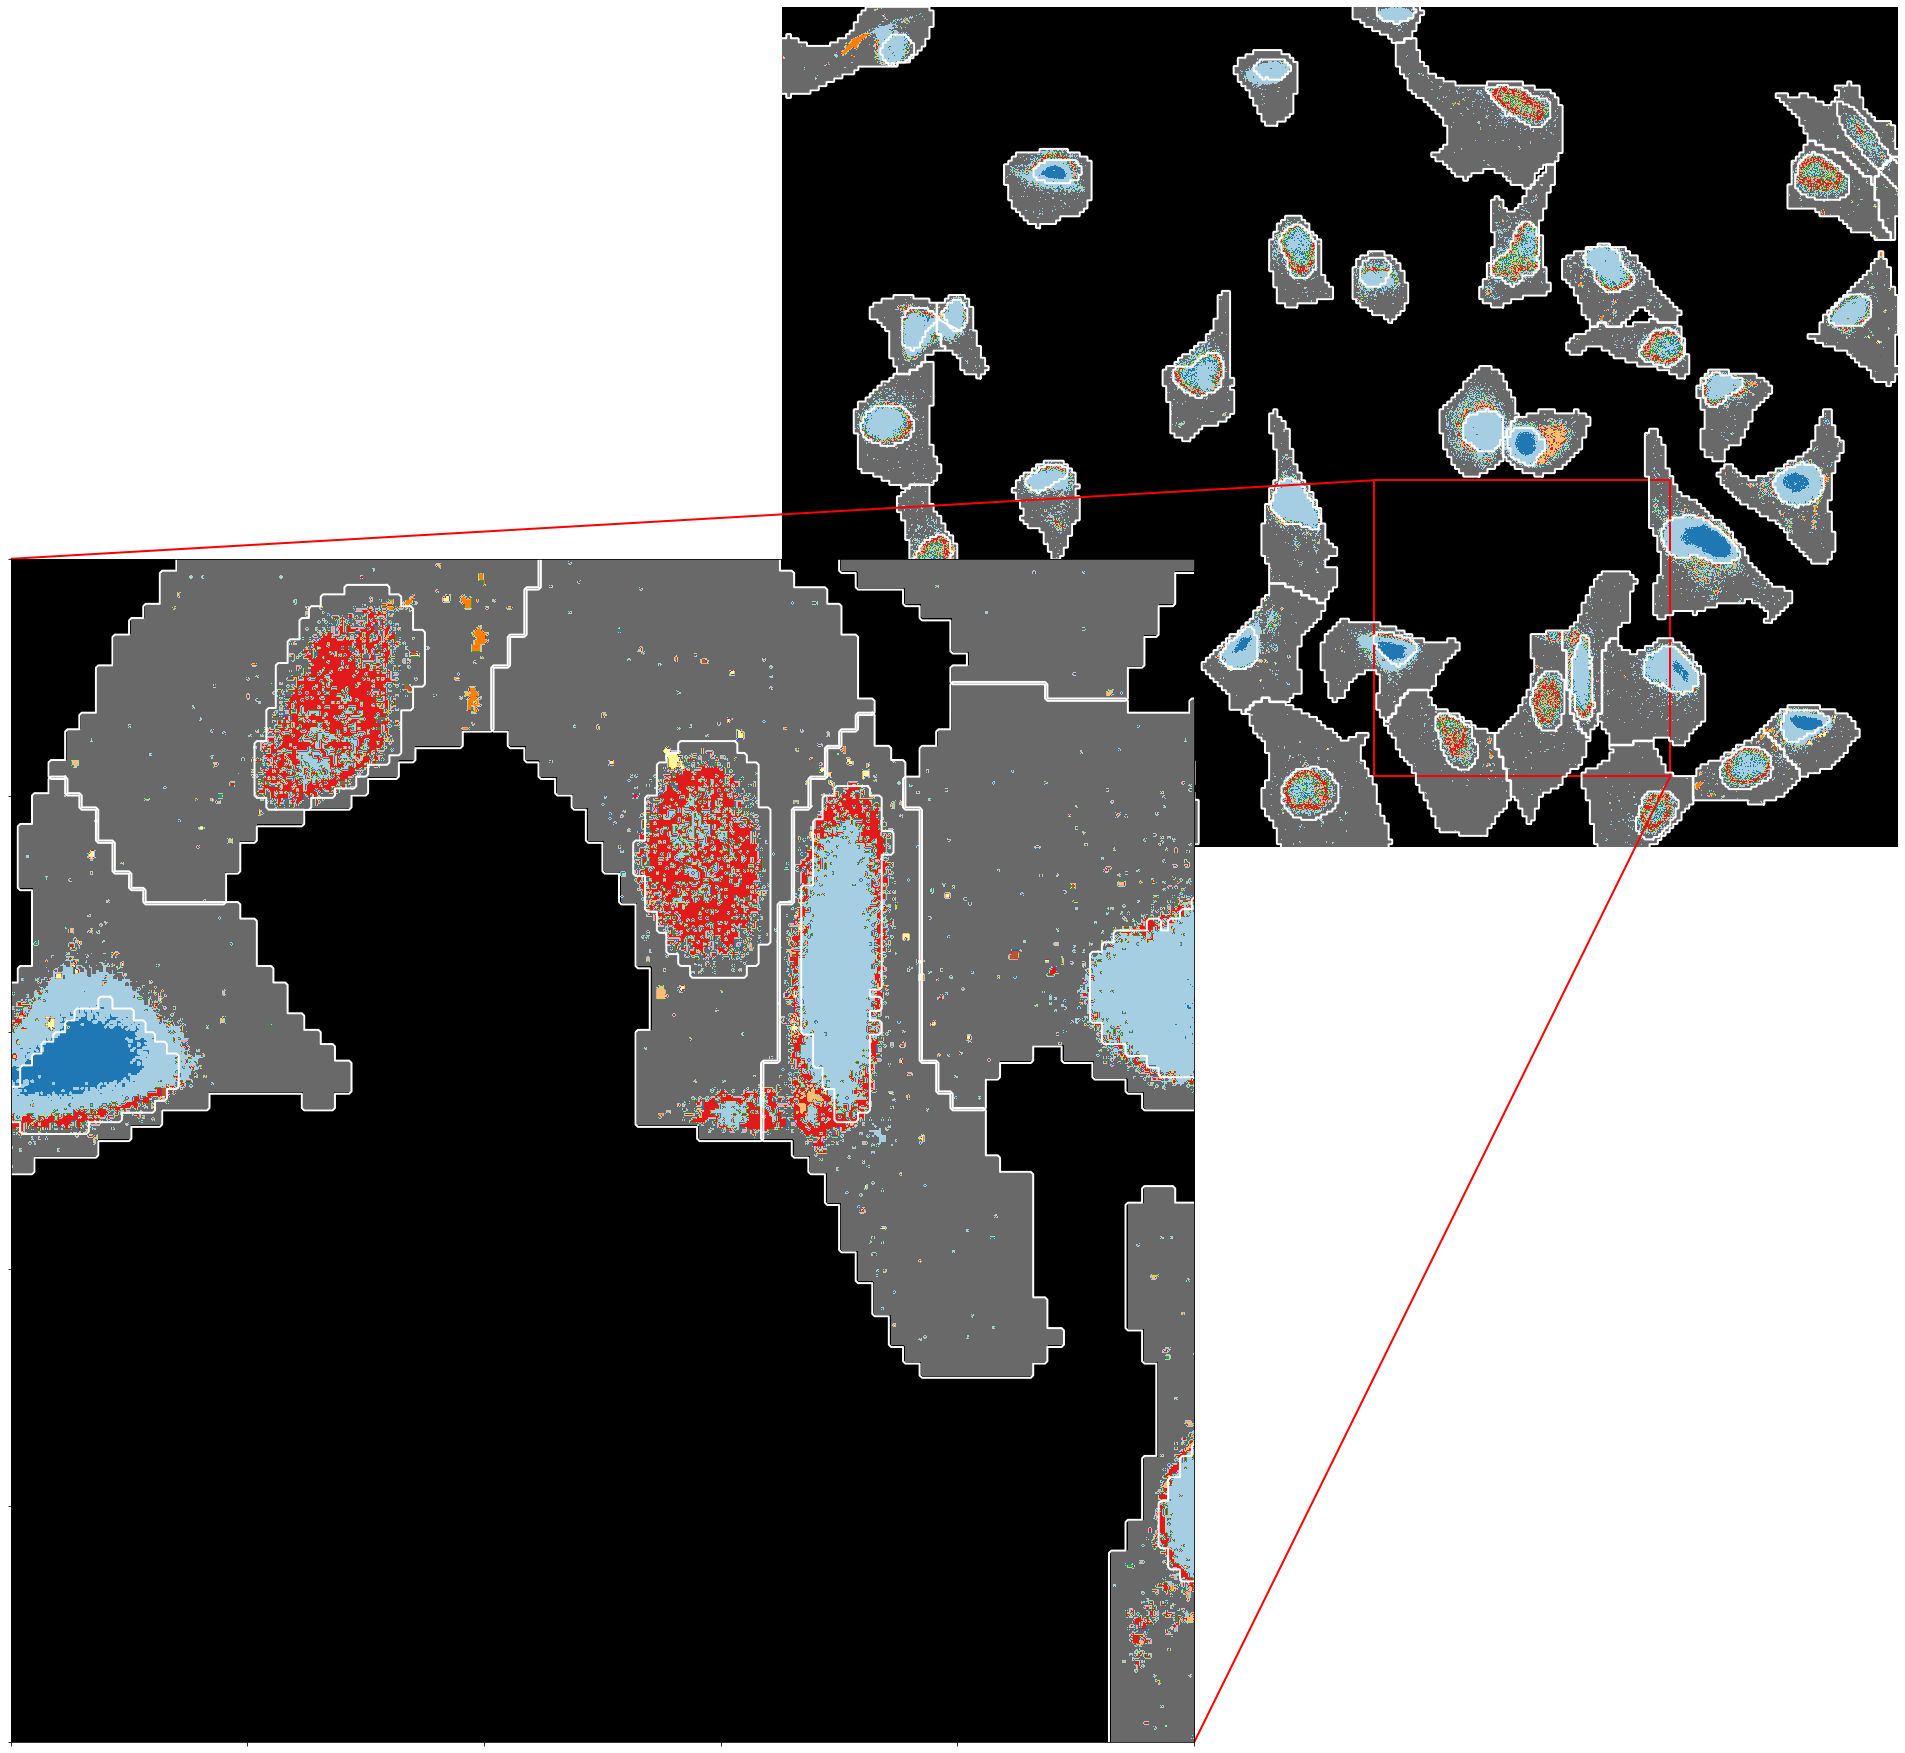

In [126]:
# Get random colormap
bg_color = np.array([[0, 0, 0, 0]])
colors = np.concatenate((bg_color, my_cmap_row))
my_cmap_bg = plt.cm.colors.ListedColormap(colors)
my_cmap_binary = plt.cm.colors.ListedColormap(['k', 'dimgray'])

# Show contour
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(mask_binary, cmap=my_cmap_binary)
ax.imshow(img, cmap=my_cmap_bg)
for label, contour in contours.items():
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2, c='w')
    ax.plot(contours_nuclei[label][:, 1],
            contours_nuclei[label][:, 0], linewidth=2, c='w')
ax.axis('off')

axins = zoomed_inset_axes(ax, 4, loc='center', bbox_to_anchor=(0,0))
axins.imshow(mask_binary, cmap=my_cmap_binary)
axins.imshow(img, cmap=my_cmap_bg)
for label, contour in contours.items():
    axins.plot(contour[:, 1], contour[:, 0], linewidth=2, c='w')
    axins.plot(contours_nuclei[label][:, 1],
            contours_nuclei[label][:, 0], linewidth=2, c='w')
axins.set_xlim(1000, 1500)
axins.set_ylim(800, 1300)
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", lw=2, ec="r")